In [4]:
!unzip AirlineSurveyData.zip

Archive:  AirlineSurveyData.zip
  inflating: test.csv                
  inflating: train.csv               
  inflating: Variable Desc.txt       
  inflating: Problem Description.docx  


In [5]:
import pandas as pd
import numpy as np

## Data Preprocessing

In [6]:
train = pd.read_csv("train.csv")

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [8]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [9]:
train.drop(["Unnamed: 0"], axis = 1, inplace=True)

In [10]:
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [11]:
test = pd.read_csv("test.csv")

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [13]:
test.drop(["Unnamed: 0"], axis = 1, inplace=True)

In [14]:
train["Cust_class"]=train["Customer Type"]+ " " +train["satisfaction"]

In [15]:
train["Cust_class"]

0            Loyal Customer neutral or dissatisfied
1         disloyal Customer neutral or dissatisfied
2                          Loyal Customer satisfied
3            Loyal Customer neutral or dissatisfied
4                          Loyal Customer satisfied
                            ...                    
103899    disloyal Customer neutral or dissatisfied
103900                     Loyal Customer satisfied
103901    disloyal Customer neutral or dissatisfied
103902    disloyal Customer neutral or dissatisfied
103903       Loyal Customer neutral or dissatisfied
Name: Cust_class, Length: 103904, dtype: object

In [16]:
train.drop(["Customer Type","satisfaction","id"], axis=1, inplace = True)

In [17]:
train.head()

,Gender,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Cust_class
0,Male,13,Personal Travel,Eco Plus,460,3,4,3,1,5,...,5,4,3,4,4,5,5,25,18.0,Loyal Customer neutral or dissatisfied
1,Male,25,Business travel,Business,235,3,2,3,3,1,...,1,1,5,3,1,4,1,1,6.0,disloyal Customer neutral or dissatisfied
2,Female,26,Business travel,Business,1142,2,2,2,2,5,...,5,4,3,4,4,4,5,0,0.0,Loyal Customer satisfied
3,Female,25,Business travel,Business,562,2,5,5,5,2,...,2,2,5,3,1,4,2,11,9.0,Loyal Customer neutral or dissatisfied
4,Male,61,Business travel,Business,214,3,3,3,3,4,...,3,3,4,4,3,3,3,0,0.0,Loyal Customer satisfied


In [18]:
test["Cust_class"]=test["Customer Type"]+ " " +test["satisfaction"]

In [19]:
test["Cust_class"]

0                         Loyal Customer satisfied
1                         Loyal Customer satisfied
2        disloyal Customer neutral or dissatisfied
3                         Loyal Customer satisfied
4                         Loyal Customer satisfied
                           ...                    
25971    disloyal Customer neutral or dissatisfied
25972                     Loyal Customer satisfied
25973       Loyal Customer neutral or dissatisfied
25974                     Loyal Customer satisfied
25975       Loyal Customer neutral or dissatisfied
Name: Cust_class, Length: 25976, dtype: object

In [20]:
test.drop(["Customer Type","satisfaction","id"], axis=1, inplace = True)

In [21]:
test.head()

,Gender,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Cust_class
0,Female,52,Business travel,Eco,160,5,4,3,4,3,...,5,5,5,5,2,5,5,50,44.0,Loyal Customer satisfied
1,Female,36,Business travel,Business,2863,1,1,3,1,5,...,4,4,4,4,3,4,5,0,0.0,Loyal Customer satisfied
2,Male,20,Business travel,Eco,192,2,0,2,4,2,...,2,4,1,3,2,2,2,0,0.0,disloyal Customer neutral or dissatisfied
3,Male,44,Business travel,Business,3377,0,0,0,2,3,...,1,1,1,1,3,1,4,0,6.0,Loyal Customer satisfied
4,Female,49,Business travel,Eco,1182,2,3,4,3,4,...,2,2,2,2,4,2,4,0,20.0,Loyal Customer satisfied


In [22]:
train.isnull().sum()

Gender                                 0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
Cust_class                             0
dtype: int64

In [23]:
train.dropna(inplace=True)

In [24]:
train.isnull().sum()

Gender                               0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
Cust_class                           0
dtype: int64

In [25]:
test.isnull().sum()

Gender                                0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
Cust_class                            0
dtype: int64

In [26]:
test.dropna(inplace=True)

In [27]:
test.isnull().sum()

Gender                               0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
Cust_class                           0
dtype: int64

##  Data Visualization

In [28]:
numerical = train.select_dtypes([np.number]).columns
numerical

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [29]:
categorical = train.select_dtypes([object]).columns
categorical

Index(['Gender', 'Type of Travel', 'Class', 'Cust_class'], dtype='object')

In [31]:
categorical.drop("Cust_class")

Index(['Gender', 'Type of Travel', 'Class'], dtype='object')

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

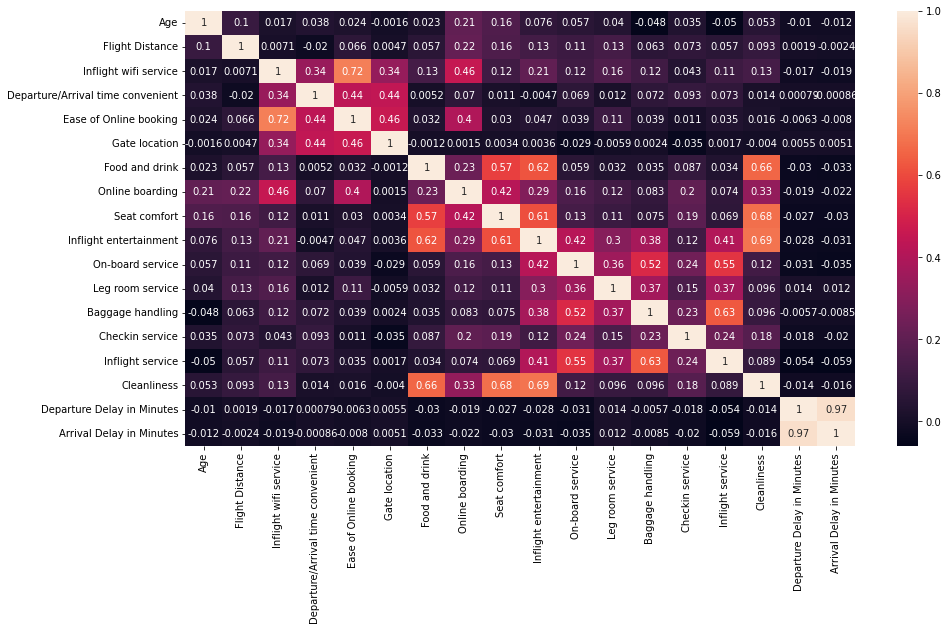

In [38]:
plt.figure(figsize=(15,8))
sns.heatmap(train.loc[:,"Gender":"Cust_class"].corr(), annot = True)

## Outlier Detection using LOF

### Train Data

In [40]:
pd.get_dummies(train[categorical], drop_first=True).head()

,Gender_Male,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Cust_class_Loyal Customer satisfied,Cust_class_disloyal Customer neutral or dissatisfied,Cust_class_disloyal Customer satisfied
0,1,1,0,1,0,0,0
1,1,0,0,0,0,1,0
2,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0


In [41]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

In [43]:
train_scaled = StandardScaler().fit_transform(train[numerical])

In [46]:
lof = LocalOutlierFactor(n_neighbors=9)

In [47]:
pred = lof.fit_predict(train_scaled)

In [60]:
pd.Series(pred).value_counts()

 1    25733
-1      160
dtype: int64

In [ ]:
train_no_outlier = train[pred==1]

### Test Data

In [ ]:
# num = test.select_dtypes([np.number]).columns
# num

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [ ]:
# cat = test.select_dtypes([object]).columns
# cat

Index(['Gender', 'Type of Travel', 'Class', 'Cust_class'], dtype='object')

In [ ]:
#cat.drop("Cust_class")

Index(['Gender', 'Type of Travel', 'Class'], dtype='object')

In [50]:
pd.get_dummies(test[categorical], drop_first=True).head()

,Gender_Male,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Cust_class_Loyal Customer satisfied,Cust_class_disloyal Customer neutral or dissatisfied,Cust_class_disloyal Customer satisfied
0,0,0,1,0,1,0,0
1,0,0,0,0,1,0,0
2,1,0,1,0,0,1,0
3,1,0,0,0,1,0,0
4,0,0,1,0,1,0,0


In [51]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

In [52]:
test_scaled = StandardScaler().fit_transform(test[numerical])

In [53]:
lof = LocalOutlierFactor(n_neighbors=9)

In [54]:
pred = lof.fit_predict(test_scaled)

In [55]:
pd.Series(pred).value_counts()

 1    25733
-1      160
dtype: int64

In [56]:
test_no_outlier = test[pred==1]

### Model Fitting

In [67]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train['Cust_class']= label_encoder.fit_transform(train['Cust_class'])

In [70]:
pd.get_dummies(train_no_outlier[categorical], drop_first=True).head()

,Gender_Male,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Cust_class_Loyal Customer satisfied,Cust_class_disloyal Customer neutral or dissatisfied,Cust_class_disloyal Customer satisfied
0,1,1,0,1,0,0,0
1,1,0,0,0,0,1,0
2,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0


In [71]:
train_no_outlier = StandardScaler().fit_transform(train_no_outlier[numerical])

In [75]:
X = train_no_outlier.columns(1:-2)

SyntaxError: ignored